In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ネットワーク構造を理解して分析する知識を身に着けるために。。 
特徴量：個々の辺や頂点の特徴、およびネットワーク全体の特徴を表す  
アルゴリズム：特徴量や経路探索、およびネットワーク分割などを計算する  
モデル：ネットワークの生成過程のメカニズムを明らかにする  
プロセス：情報伝達などネットワーク上における振る舞いを理解する  

## ネットワーク分析ツール
NetworkX：NumPyやSciPyとの連携が簡単  
Gephi：ネットワークのインタラクティブな可視化及び分析を行うツール。GDF, GEXF, GraphML, GMLなど数多くのデータフォーマットでの入出力が可能です。  
graph-tool：ネットワーク分析ツール  
igraph：可視化や中心性解析、コミュニティ抽出などが扱える。R, Python, C, C++と組み合わせて用いることができる  
Bokeh：インタラクティブな可視化を行うためのライブラリ  

# ネットワークの分析の流れ  
## 可視化  
- 辺の交差や頂点の重なりを少なくしたい
- 頂点が一部に集中せずに、平面上で散らばってほしい  
- 関連性のある頂点や辺は近くに配置したい  
- 対称性や階層性などを反映して可視化したい  

Saving lesmis.gml to lesmis.gml
User uploaded file"lesmis.gml" with length 17610 bytes


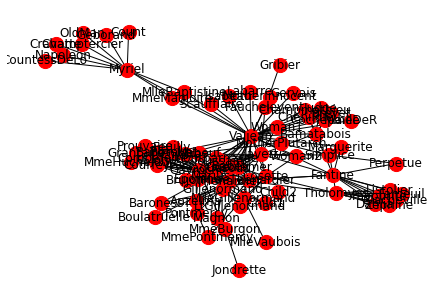

In [ ]:
import networkx as nx
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file"{name}" with length {length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))
  G = nx.readwrite.gml.read_gml(fn)
  nx.draw_spring(G, node_size=200, node_color="red", with_labels=True)

Saving lesmis.gml to lesmis (1).gml


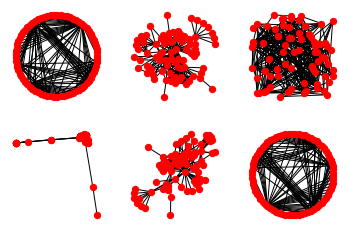

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  G = nx.readwrite.gml.read_gml(fn)

plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color="red", with_labels=False) # 頂点を円周上に配置する
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40, node_color="red", with_labels=False) # 頂点を力学モデルにより配置する
plt.subplot(233)
nx.draw_random(G, node_size=40, node_color="red", with_labels=False) # 頂点をランダムに配置する
plt.subplot(234)
nx.draw_spectral(G, node_size=40, node_color="red", with_labels=False) # ネットワークを表す行列の固有ベクトルにより、頂点を配置する
plt.subplot(235)
nx.draw_spring(G, node_size=40, node_color="red", with_labels=False) # 頂点を力学モデルにより配置する
plt.subplot(236)
nx.draw_shell(G, node_size=40, node_color="red", with_labels=False) # 頂点を同心円上に配置する



# 中心性の計算
- 次数中心性（Degree Centrality）  
多くの頂点とつながっている頂点を中心的とみなすもの
- 固有ベクトル中心性（Eigenvector Centrality）  
周囲の頂点の中心性も加味し、多くの中心的な頂点とつながっている頂点を中心的とみなす
- 近接中心性（Closeness Centrality）  
ネットワーク中の他の頂点へ短い距離で到達できる頂点を中心的とみなすもの
- 媒介中心性（Betweenness Centrality）  
その頂点がなくなると多くの経路が分断されてしまうような頂点を中心的とみなすもの


Saving lesmis.gml to lesmis (3).gml


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  # Remove the CWD from sys.path while we load stuff.


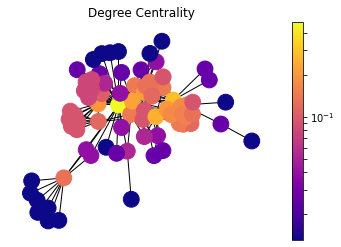

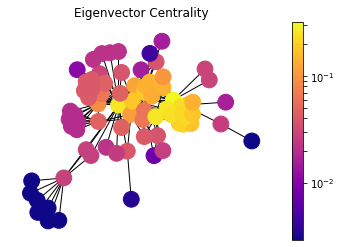

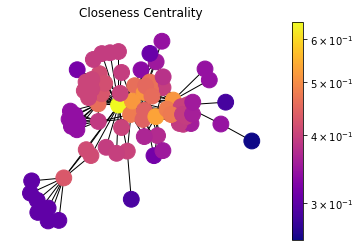

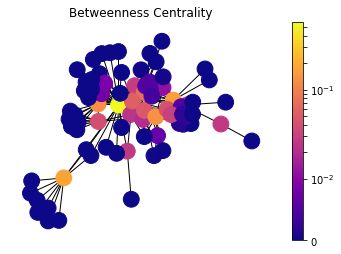

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_h(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250,
                                   cmap = plt.cm.plasma, 
                                   node_color = list(measures.values()),
                                   nodelist = list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis("off")
    plt.show()

import numpy as np
import numpy.linalg as LA
from pprint import pprint
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    G = nx.readwrite.gml.read_gml(fn)
pos = nx.spring_layout(G)
draw_h(G, pos, nx.degree_centrality(G), "Degree Centrality")
draw_h(G, pos, nx.eigenvector_centrality(G), "Eigenvector Centrality")
draw_h(G, pos, nx.closeness_centrality(G), "Closeness Centrality")
draw_h(G, pos, nx.betweenness_centrality(G), "Betweenness Centrality")

## ネットワーク分析の特徴量
- 頂点の数・辺の数などなど

In [1]:
# 特徴量の計算

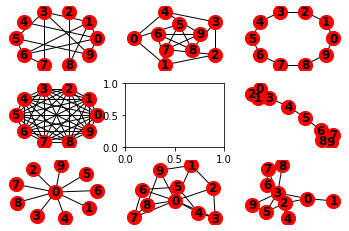

In [14]:
# リスト 2.4 さまざまな構造のネットワーク
import networkx as nx
import matplotlib.pyplot as plt
rnd = nx.gnp_random_graph(10,0.3)
plt.subplot(331)
nx.draw_circular(rnd, node_size=200, node_color='red', with_labels=True, font_weight='bold')

petersen = nx.petersen_graph()
plt.subplot(332)
nx.draw_shell(petersen, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

cycle = nx.cycle_graph(10)
plt.subplot(333)
nx.draw_circular(cycle, node_size=200, node_color='red', with_labels=True, font_weight='bold')

K_10 = nx.complete_graph(10)
plt.subplot(334)
nx.draw_circular(K_10, node_size=200, node_color='red', with_labels=True, font_weight='bold')

K_5_5 = nx.complete_bipartite_graph(5, 5)
plt.subplot(335)
# nx.draw_circular(K_5_5, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

barbell = nx.barbell_graph(4, 2)
plt.subplot(336)
nx.draw_spring(barbell, node_size=200, node_color='red', with_labels=True, font_weight='bold')

star = nx.star_graph(9)
plt.subplot(337)
nx.draw(star, node_size=200, node_color='red', with_labels=True, font_weight='bold')

wheel = nx.wheel_graph(10)
plt.subplot(338)
nx.draw(wheel, node_size=200, node_color='red', with_labels=True, font_weight='bold')

ba = nx.barabasi_albert_graph(10, 2)
plt.subplot(339)
nx.draw_spring(ba, node_size=200, node_color='red', with_labels=True, font_weight='bold')

## ネットワークの密度とクラスタ係数
- 平均次数・平均パス長・assortativity(次数相関)

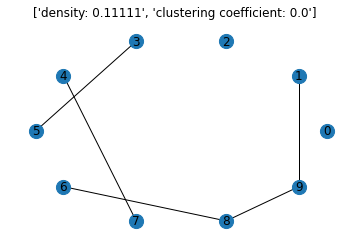

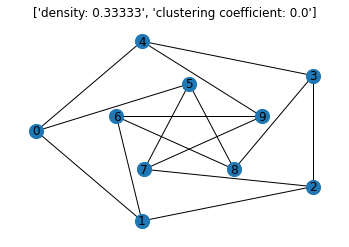

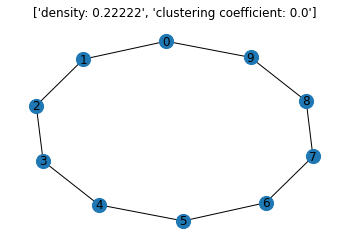

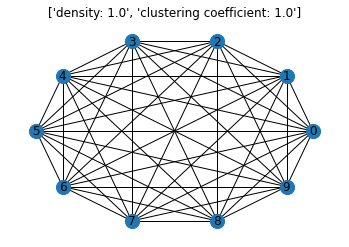

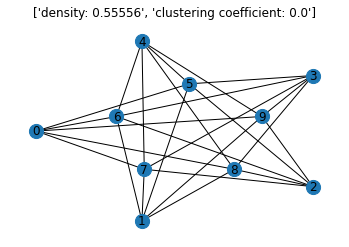

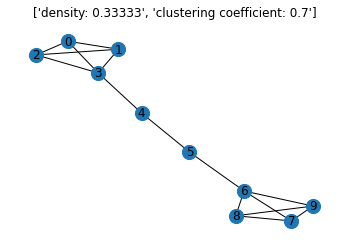

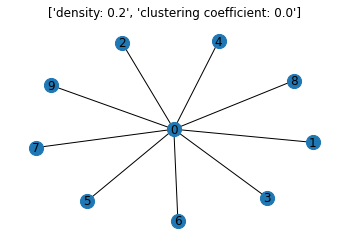

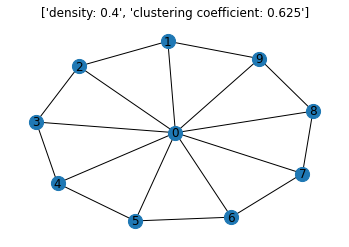

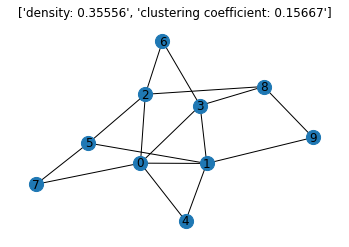

In [15]:
# リスト 2.5 ネットワークの密度とクラスタ係数
import networkx as nx
import matplotlib.pyplot as plt

def draw_m(G, pos):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)     
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(['density: {:.5}'.format(nx.density(G)), 'clustering coefficient: {:.5}'.format(nx.average_clustering(G))])
    plt.axis('off')
    plt.show()

rnd = nx.gnp_random_graph(10,0.1)
pos = nx.circular_layout(rnd)
draw_m(rnd, pos)

petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5, 10), range(5)])
draw_m(petersen, pos)

cycle = nx.cycle_graph(10)
pos = nx.spring_layout(cycle)
draw_m(cycle, pos)

K_10 = nx.complete_graph(10)
pos = nx.circular_layout(K_10)
draw_m(K_10, pos)

K_5_5 = nx.complete_bipartite_graph(5, 5)
pos = nx.shell_layout(K_5_5, nlist=[range(5, 10), range(5)])
draw_m(K_5_5, pos)

barbell = nx.barbell_graph(4, 2)
pos = nx.spring_layout(barbell)
draw_m(barbell, pos)

star = nx.star_graph(9)
pos = nx.spring_layout(star)
draw_m(star, pos)

wheel = nx.wheel_graph(10)
pos = nx.spring_layout(wheel)
draw_m(wheel, pos)

ba = nx.barabasi_albert_graph(10, 2)
pos = nx.spring_layout(ba)
draw_m(ba, pos)

## コミュニティの抽出
この抽出方法はネットワークの分割の良さを表す「モジュラリティ」と呼ばれる指標に基づく。  
その値を最大にするネットワーク分割を行う

Saving lesmis.gml to lesmis.gml
User uploaded file "lesmis.gml" with length 17610 bytes


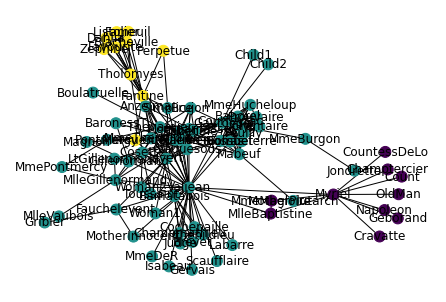

In [16]:
# リスト 2.6 コミュニティの抽出
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=120, with_labels=True)


## 結果の出力と保存

Saving lesmis.gml to lesmis (1).gml
User uploaded file "lesmis.gml" with length 17610 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

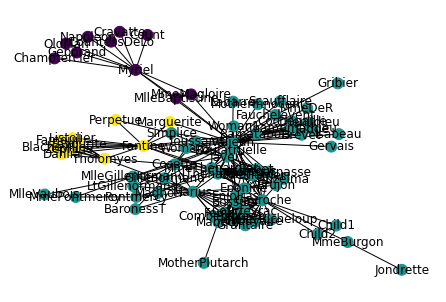

In [17]:
# リスト 2.7 ネットワーク可視化の画像の出力
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=120, with_labels=True)

savefn = fn.split('.')[0]+'.png'
plt.savefig(savefn)
files.download(savefn) 
